In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

In [3]:
person = [0.7785934, 0.7902058, 0.8144967, 0.7993604, 0.6957953, 0.78516525, 0.81369853, 0.74844253]
person_rand = [0.4997632, 0.53151315, 0.4953193, 0.48565182, 0.51492274, 0.50330985, 0.47631958, 0.5]
face = [0.83686125, 0.8601667, 0.84533286, 0.8287057, 0.75272024, 0.88401073, 0.8057525, 0.8155809]
face_rand = [0.50652635, 0.49794447, 0.6964292, 0.5, 0.57799053, 0.4734094, 0.5340897, 0.5132827]
animal = [0.728, 0.778, 0.832, 0.724, 0.685, 0.763, 0.760, 0.822]
animal_rand = [0.490, 0.518, 0.467, 0.506, 0.492, 0.492, 0.490, 0.460]
vehicle = [0.63666004, 0.7749062, 0.70542634, 0.6765815, 0.5861905, 0.66044986, 0.637699, 0.72237015]
vehicle_rand = [0.51243365, 0.46709448, 0.5088834, 0.5, 0.4573095, 0.5398707, 0.5137987, 0.5396303]
outdoor = [0.6075605, 0.595832, 0.58580244, 0.61947834, 0.48774514, 0.68280077, 0.64264286, 0.64079547]
outdoor_rand = [0.4352548, 0.47683832, 0.54090405, 0.4749565, 0.50131303, 0.49639726, 0.45271426, 0.3698519]
sports = [0.67907643, 0.8179509, 0.8033872, 0.7283197, 0.6249999, 0.7426069, 0.67639476, 0.7721769]
sports_rand = [0.4761905, 0.5304762, 0.50676864, 0.5143444, 0.50541246, 0.5006824, 0.4957806, 0.49680126]
food = [0.83188015, 0.7146096, 0.78497267, 0.7598106, 0.7156991, 0.71799564, 0.777656, 0.76861054]
food_rand = [0.4390853, 0.54637724, 0.5690207, 0.49045455, 0.5523299, 0.5573561, 0.48547196, 0.44132835]
furniture = [0.74236554, 0.63419354, 0.67153484, 0.56088924, 0.6056729, 0.6840717, 0.6891775, 0.6668134]
furniture_rand = [0.5313172, 0.49489248, 0.47832003, 0.49440512, 0.42427492, 0.56255865, 0.52089465, 0.49288598]
tool = [0.63215446, 0.6133107, 0.6596611, 0.5776302, 0.60100305, 0.5842055, 0.58849084, 0.58240765]
tool_rand = [0.5460421, 0.5170847, 0.47180894, 0.5039796, 0.4977509, 0.4730363, 0.4816711, 0.495408]

In [4]:
def process(categories, categories_rand, names):
    CTEs = [np.mean(c) for c in categories]
    CTEs_rand = [np.mean(c) for c in categories_rand]
    error = [np.std(c) for c in categories]
    error_rand = [np.std(c) for c in categories_rand]
    x_pos = np.arange(len(categories))*5
    return CTEs, CTEs_rand, error, error_rand, x_pos

In [5]:
# Build the plot
def build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, title, leg_loc):
    plt.rc('font', size=20)
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 8)
    plt.yticks(np.arange(0, 1, 0.1))
    ax.bar(x_pos, CTEs, yerr=error, align='center', color='blue', alpha=0.8, ecolor='black', capsize=20, width=2)
    ax.bar(x_pos+2, CTEs_rand, yerr=error_rand, align='center', color='red', alpha=0.8, ecolor='black', capsize=20, width=2)
    ax.set_ylabel('AUC')
    ax.set_xticks(x_pos+1)
    ax.set_xticklabels(names)
    ax.set_title(title)
    ax.yaxis.grid(True)
    ax.legend(['Model', 'Random'], loc=leg_loc)
    ax.patches
    i = 0
    for p, pval in zip(ax.patches, pvals_corrected):
        if pval < 0.001:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '***', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.01:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '**', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.05:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '*', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        # ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 'n.s.', ha='center')
        i += 1
    # Save the figure and show
    # plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()
    return

In [6]:
def ttest(names, categories, categories_rand):
    pvals = []
    for r, u, v in zip(names, categories, categories_rand):
        print(r,':')
        t_stat = stats.ttest_ind(u, v).statistic
        pval = stats.ttest_ind(u, v).pvalue / 2
        print('t-statistic:', t_stat, 'p-value:', pval)
        pvals.append(pval)
    # Create a list of the adjusted p-values
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='bonferroni') 
    print("Bonferroni:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='fdr_bh') # Benjamini/Hochberg
    print("Benjamini/Hochberg:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    return pvals_corrected

face :
t-statistic: 10.11598979645343 p-value: 4.048212655325941e-08
animal :
t-statistic: 14.485996688747932 p-value: 4.0327720375866824e-10
person :
t-statistic: 18.272385980721282 p-value: 1.8229482953080907e-11
furniture :
t-statistic: 6.424601156575583 p-value: 7.940906584404202e-06
vehicle :
t-statistic: 7.301613495177112 p-value: 1.9499300348921045e-06
sports :
t-statistic: 9.325960202953269 p-value: 1.1007113032725453e-07
food :
t-statistic: 10.48336492617673 p-value: 2.5948253991602724e-08
outdoor :
t-statistic: 5.123433637760139 p-value: 7.743513102378257e-05
tool :
t-statistic: 7.945035076865092 p-value: 7.418784360360348e-07
Bonferroni:

Reject: [ True  True  True  True  True  True  True  True  True]
pvals corrected: [3.64339139e-07 3.62949483e-09 1.64065347e-10 7.14681593e-05
 1.75493703e-05 9.90640173e-07 2.33534286e-07 6.96916179e-04
 6.67690592e-06]
Benjamini/Hochberg:

Reject: [ True  True  True  True  True  True  True  True  True]
pvals corrected: [9.10847847e-08 1.81

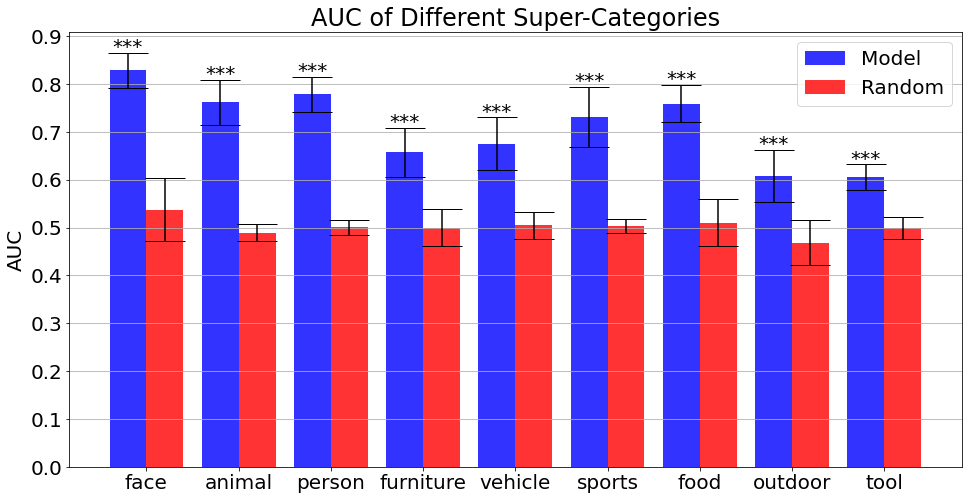

In [7]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor, tool]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand, tool_rand]
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'AUC of Different Super-Categories', leg_loc='upper right')

In [8]:
vehicle_fine =[[0.58125, 0.7691198, 0.79435486, 0.6108742], [0.6608266, 0.6815733, 0.5833334, 0.62251985],
               [0.72161174, 0.71111107, 0.7071429, 0.5750315], [0.6396198, 0.4695562, 0.51960784, 0.4989339],
               [0.68824404, 0.5269397, 0.60718787, 0.6760684], [0.64285713, 0.7368421, 0.7398437, 0.6929687],
               [0.76612896, 0.6329365, 0.6181818, 0.6516172], [0.75111115, 0.49999997, 0.5625, 0.6051136]]
vehicle_fine_rand = [[0.54080886, 0.52886, 0.6922043, 0.47547978], [0.63791555, 0.46012932, 0.4779762, 0.35813493],
                     [0.6021978, 0.691453, 0.5488095, 0.5081967], [0.5855263, 0.51238394, 0.42208463, 0.36140728],
                     [0.55543154, 0.5414871, 0.55674654, 0.67948717], [0.48251486, 0.5954592, 0.44765627, 0.39609376],
                     [0.5062724, 0.34325397, 0.5151515, 0.32749325], [0.4088889, 0.6875, 0.875, 0.3096591]]

animal_fine = [[0.6481482, 0.6421121, 0.60411906, 0.63349515], [0.69393593, 0.69372153, 0.6923544, 0.610698],
               [0.5675058, 0.5255367, 0.7754121, 0.56664205], [0.58093864, 0.6166886, 0.6203704, 0.61058205],
               [0.6941799, 0.57110393, 0.6571602, 0.65031403], [0.61043954, 0.56400263, 0.72712415, 0.72743064],
               [0.6039683, 0.63265973, 0.61603767, 0.5378473], [0.5667293, 0.5735931, 0.5890411, 0.5961538]]

animal_fine_rand =[[0.53225803, 0.5159713, 0.5700801, 0.47633496], [0.56607556, 0.51838, 0.523665, 0.49313504],
                   [0.62871855, 0.5439167, 0.39423078, 0.4425626], [0.6036877, 0.5246873, 0.5887799, 0.5436508],
                   [0.5275132, 0.49902597, 0.40716022, 0.5769231], [0.5348901, 0.49106565, 0.6840959, 0.66215277],
                   [0.46031743, 0.4180248, 0.31037736, 0.48020834], [0.4520677, 0.5530303, 0.66438353, 0.48387098]]

food_fine = [[0.8714286, 0.51863354, 0.65086204, 0.7650862], [0.54365075, 0.46031746, 0.5870371, 0.6538462],
             [0.6394231, 0.6040373, 0.6025641, 0.659375], [0.5261905, 0.39166665, 0.66379315, 0.6537267],
             [0.6433823, 0.53333336, 0.5952381, 0.5119047], [0.6691176, 0.5566667, 0.5892858, 0.5238095]]

food_fine_rand = [[0.52619046, 0.7111801, 0.4267241, 0.5344828], [0.6587302, 0.484127, 0.5407407, 0.63286716],
                  [0.48878208, 0.53260875, 0.5032052, 0.27500004], [0.38571426, 0.3516667, 0.43318966, 0.38509315],
                  [0.49632353, 0.44666666, 0.53571427, 0.2916667], [0.5036765, 0.63666666, 0.52380955, 0.17857142]]

tool_fine =[[0.69545454, 0.57526875, 0.43548387, 0.7661291], [0.68703705, 0.40734267, 0.5192308, 0.43548387],
            [0.7099359, 0.7047414, 0.81666666, 0.5537634], [0.5833334, 0.5913979, 0.5857143, 0.70625],
            [0.61755955, 0.7214286, 0.67741936, 0.76508623], [0.6, 0.6880952, 0.78571427, 0.7392241],
            [0.599359, 0.621875, 0.7392473, 0.6451613], [0.6888889, 1.0, 0.6969697, 0.7692307]]

tool_fine_rand = [[0.5727273, 0.59408605, 0.47580647, 0.50268817], [0.55370367, 0.59790206, 0.30944058, 0.6182796],
                  [0.70512825, 0.5603448, 0.57962966, 0.7419355], [0.35818714, 0.28763443, 0.25714287, 0.496875],
                  [0.47767854, 0.23571427, 0.32795703, 0.3987069], [0.49814814, 0.4738095, 0.5257937, 0.62931037],
                  [0.52403843, 0.53437495, 0.40053767, 0.7069892], [0.7, 0.3076923, 0.43939394, 1.0]]

car :
t-statistic: 4.160484728553303 p-value: 0.0004808604758638825
airplane :
t-statistic: 1.4447581123120188 p-value: 0.08526716579828146
train :
t-statistic: 1.1886233241211586 p-value: 0.12717994576537847
boat :
t-statistic: 3.8954093806795997 p-value: 0.0008081467525797254
Bonferroni:

Reject: [ True False False  True]
pvals corrected: [0.00192344 0.34106866 0.50871978 0.00323259]
Benjamini/Hochberg:

Reject: [ True False False  True]
pvals corrected: [0.00161629 0.11368955 0.12717995 0.00161629]


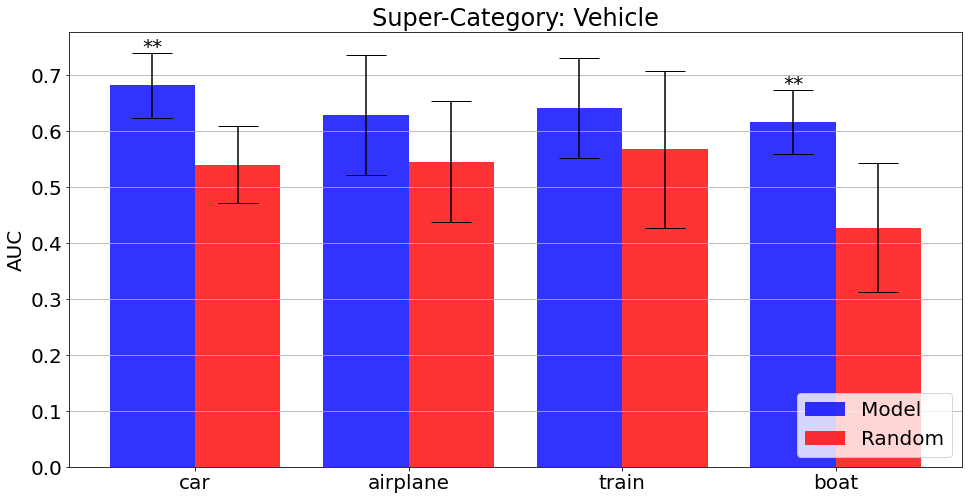

In [134]:
#names = ['bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat']
names = ['car', 'airplane', 'train', 'boat']
categories, categories_rand = vehicle_fine, vehicle_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'Super-Category: Vehicle', 'lower right')

bird :
t-statistic: 2.8758706605744875 p-value: 0.0061051814745594546
dog :
t-statistic: 3.9216533827258835 p-value: 0.0007674747830663056
horse :
t-statistic: 2.679843775432803 p-value: 0.008975509037080663
giraffe :
t-statistic: 2.996904657218657 p-value: 0.004805145541380801
Bonferroni:

Reject: [ True  True  True  True]
pvals corrected: [0.02442073 0.0030699  0.03590204 0.01922058]
Benjamini/Hochberg:

Reject: [ True  True  True  True]
pvals corrected: [0.00814024 0.0030699  0.00897551 0.00814024]


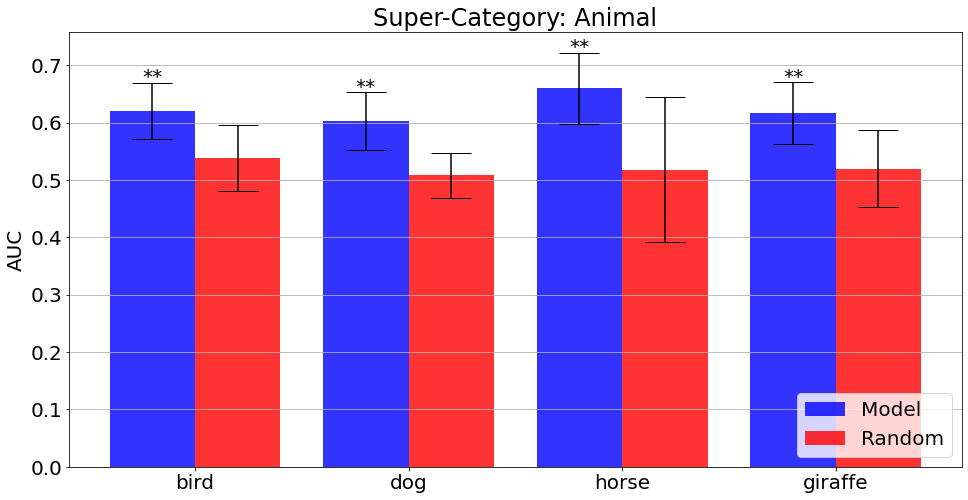

In [140]:
#names = ['bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe']
names = ['bird', 'dog', 'horse', 'giraffe']
categories, categories_rand = animal_fine, animal_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, 'Super-Category: Animal', 'lower right')

banana :
t-statistic: 2.247481009757827 p-value: 0.024193044740889083
orange :
t-statistic: -0.2666971011558669 p-value: 0.39756060403810284
broccoli :
t-statistic: 4.832508721369794 p-value: 0.00034459185131255137
pizza :
t-statistic: 3.0576869990972178 p-value: 0.006046046745998139
Bonferroni:

Reject: [False False  True  True]
pvals corrected: [0.09677218 1.         0.00137837 0.02418419]
Benjamini/Hochberg:

Reject: [ True False  True  True]
pvals corrected: [0.03225739 0.3975606  0.00137837 0.01209209]


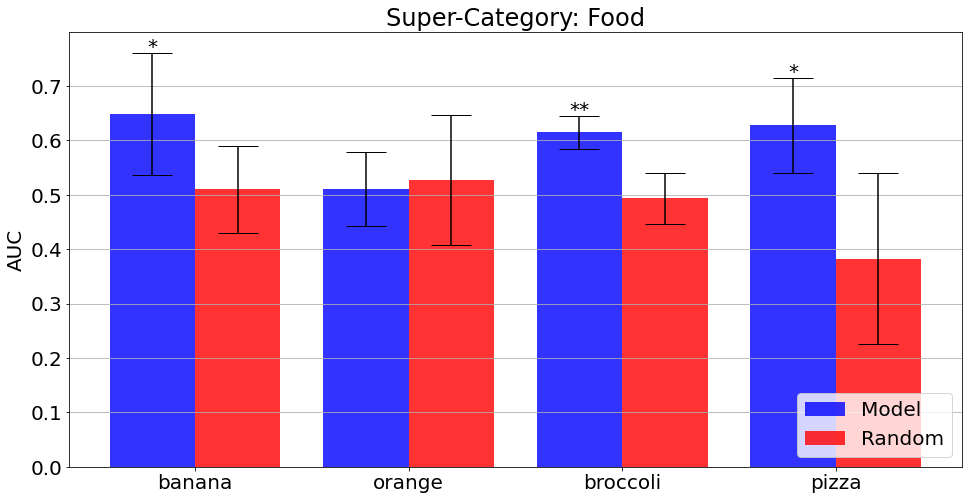

In [136]:
# names = ['banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog','pizza', 'donut', 'cake']
names = ['banana', 'orange', 'broccoli','pizza']
categories, categories_rand = food_fine, food_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, 'Super-Category: Food', 'lower right')


handbag :
t-statistic: 2.2182649208370577 p-value: 0.02179035567791268
baseball bat :
t-statistic: 2.7009925866357944 p-value: 0.008611569538282002
baseball glove :
t-statistic: 3.9475763488374587 p-value: 0.0007293447364923485
tennis racket :
t-statistic: 0.4541816241899196 p-value: 0.32832989761221726
Bonferroni:

Reject: [False  True  True False]
pvals corrected: [0.08716142 0.03444628 0.00291738 1.        ]
Benjamini/Hochberg:

Reject: [ True  True  True False]
pvals corrected: [0.02905381 0.01722314 0.00291738 0.3283299 ]


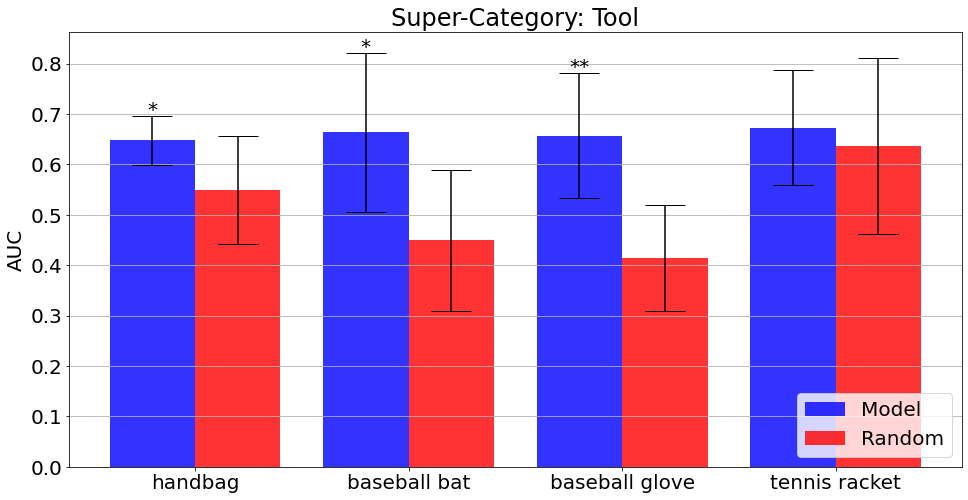

In [137]:
names = ['handbag', 'baseball bat', 'baseball glove', 'tennis racket']

categories, categories_rand = tool_fine, tool_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, 'Super-Category: Tool', 'lower right')

face :
t-statistic: nan p-value: nan
animal :
t-statistic: nan p-value: nan
vehicle :
t-statistic: nan p-value: nan
sport :
t-statistic: nan p-value: nan
food :
t-statistic: nan p-value: nan
person :
t-statistic: nan p-value: nan
tool :
t-statistic: nan p-value: nan
outdoor :
t-statistic: nan p-value: nan
furniture :
t-statistic: nan p-value: nan
Bonferroni:

Reject: [False False False False False False False False False]
pvals corrected: [nan nan nan nan nan nan nan nan nan]
Benjamini/Hochberg:

Reject: [False False False False False False False False False]
pvals corrected: [nan nan nan nan nan nan nan nan nan]
p-value: 0.00219085202617631


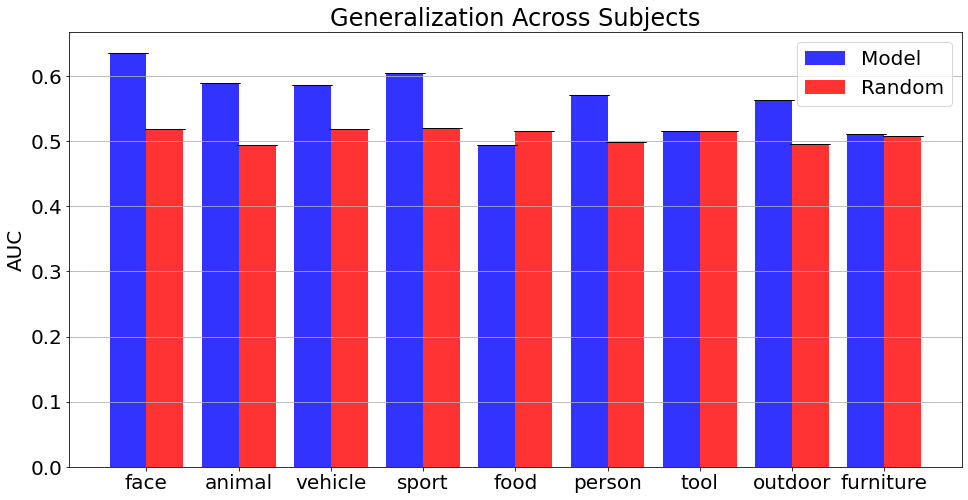

In [138]:
names = ['face', 'animal', 'vehicle', 'sport', 'food', 'person', 'tool', 'outdoor', 'furniture']
sub1_2 = [[0.636, 0.589, 0.587, 0.604, 0.494, 0.571, 0.515, 0.564, 0.511]]
sub1_2_rand = [[0.519, 0.494, 0.518, 0.521, 0.516, 0.498, 0.516, 0.496, 0.508]]
categories, categories_rand = sub1_2, sub1_2_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
t_stat = stats.ttest_ind(sub1_2[0], sub1_2_rand[0]).statistic
pval = stats.ttest_ind(sub1_2[0], sub1_2_rand[0]).pvalue / 2
print("p-value:", pval)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'Generalization Across Subjects', 'upper right')


In [9]:
vehicle_fine =[[0.5520834, 0.5609757, 0.4936034, 0.68632483, 0.6458334, 0.6460937, 0.62421185, 0.757971],
               [0.40563726, 0.51083595, 0.6716418, 0.6530173, 0.66287875, 0.42640692, 0.6152543, 0.52321434],
               [0.5549242, 0.6397727, 0.5748106, 0.69981056, 0.53675216, 0.7698412, 0.65119046, 0.523088],
               [0.6596244, 0.658167, 0.5835938, 0.5535714, 0.5698925, 0.63059163, 0.56935686, 0.6140725],
               [0.71505374, 0.58656836, 0.9217391, 0.5141129, 0.5213675, 0.5132409, 0.621775, 0.5287847],
               [0.51449275, 0.5653045, 0.5923077, 0.77738094, 0.42217487, 0.7101563, 0.54531246, 0.4936034],
               [0.5266524, 0.5578416, 0.38166314, 0.8676471, 0.5102564, 0.6418011, 0.42110875, 0.37094018],
               [0.5902778, 0.70170456, 0.6333333, 0.5208333, 0.08333333, 0.625, 0.42083332, 0.7203066]]
vehicle_fine_rand = [[0.44223487, 0.51034737, 0.33901918, 0.51282054, 0.51704544, 0.55, 0.6197983, 0.46811596],
                     [0.53063726, 0.47368422, 0.43496802, 0.4466595, 0.5265152, 0.49999997, 0.50338984, 0.54761904], 
                     [0.5265151, 0.48674244, 0.5776515, 0.59375, 0.6076923, 0.6601732, 0.58928573, 0.39610392], 
                     [0.21126762, 0.50554323, 0.46484375, 0.3886905, 0.63709676, 0.5815296, 0.62358135, 0.43283582],
                     [0.3172043, 0.51863354, 0.3608696, 0.38172042, 0.43418804, 0.5630517, 0.58152735, 0.5127932],
                     [0.67391306, 0.5400641, 0.44615385, 0.53809524, 0.29317698, 0.5265626, 0.5546875, 0.4029851],
                     [0.5948827, 0.4052795, 0.47654587, 0.569853, 0.5452991, 0.48118278, 0.4136461, 0.4905983],
                     [0.40972227, 0.56392044, 0.35151517, 0.7083333, 0.19444446, 0.5183823, 0.5020833, 0.44444448]]

animal_fine = [[0.649671, 0.44780222, 0.6649243, 0.48993057, 0.6743827, 0.39285713, 0.52730584, 0.6270605, 0.4015873, 0.7908879],
               [0.6633987, 0.6108911, 0.5360902, 0.8138737, 0.49873737, 0.4722222, 0.46909723, 0.41121495, 0.48168316, 0.6388889],
               [0.5266876, 0.6989796, 0.5546929, 0.43730158, 0.21363637, 0.35, 0.32863638, 0.7818182, 0.3859223, 0.584375],
               [0.6126374, 0.6811321, 0.60628027, 0.724299, 0.6559633, 0.49299064, 0.22777778, 0.4135514, 0.4542484, 0.60304654],
               [0.6703948, 0.5518182, 0.6681884, 0.57623625, 0.48650795, 0.5521978, 0.42211333, 0.6203271, 0.5288671, 0.6345316],
               [0.6804545, 0.41140118, 0.53098595, 0.5048077, 0.57698417, 0.67376375, 0.6747573, 0.52063495, 0.39272726, 0.66409093],
               [0.5357639, 0.5185185, 0.6382979, 0.49528298, 0.49999997, 0.59579444, 0.45327103, 0.6513762, 0.42029706, 0.57772726],
               [0.5188531, 0.7, 0.58097935, 0.39285713, 0.5419754, 0.69687504, 0.8189033, 1.0, 0.36128047, 0.5631579]]
animal_fine_rand =[[0.63552624, 0.5121664, 0.48990625, 0.42430556, 0.24537039, 0.39920637, 0.37924755, 0.56318676, 0.48650792, 0.69859815],
                   [0.7706972, 0.55346537, 0.52631575, 0.6208792, 0.5816498, 0.4698413, 0.6013889, 0.5303738, 0.48861384, 0.5038126],
                   [0.56240183, 0.5588697, 0.4844721, 0.64047617, 0.45454547, 0.445283, 0.4309091, 0.52272725, 0.73968446, 0.4767361],
                   [0.49945053, 0.5216981, 0.5086266, 0.54672897, 0.84403676, 0.5245327, 0.4920635, 0.4719626, 0.459695, 0.5253883], 
                   [0.38223684, 0.44954547, 0.51150477, 0.59752744, 0.43333334, 0.5041209, 0.6448802, 0.35864484, 0.4765795, 0.43899783], 
                   [0.62636364, 0.49038464, 0.49507043, 0.60027474, 0.4626984, 0.52884614, 0.4836165, 0.5888888, 0.45545456, 0.6],
                   [0.42256945, 0.6111111, 0.49318483, 0.26698112, 0.45000002, 0.4334112, 0.30957943, 0.4082569, 0.3841584, 0.5304546],
                   [0.49450114, 0.5481482, 0.51789075, 0.44940475, 0.5950617, 0.70729166, 0.5151515, 0.93529403, 0.32926828, 0.39934206]]

[0.56484324 0.5976463  0.60658661 0.65908729 0.49406111 0.62039147
 0.55863038 0.56649759]


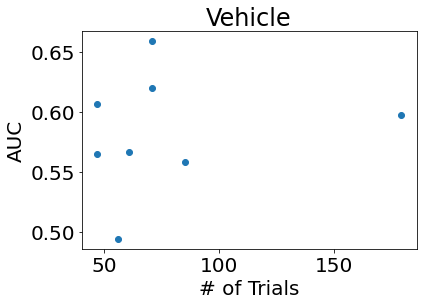

[0.60723263 0.57756786 0.59755491 0.55432361 0.5185234  0.52833763
 0.49023277 0.62824791 0.42832663 0.63208825]


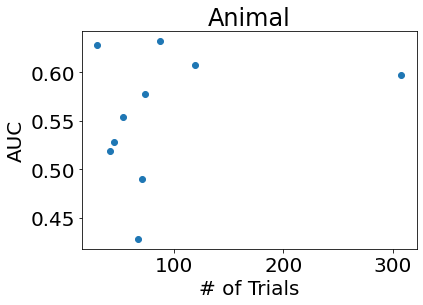

In [16]:
x=[47, 179,  47,  71,  56,  71,  85,  61]
y=np.array(vehicle_fine).mean(axis=0)
print(y)
plt.xlabel("# of Trials")
plt.ylabel("AUC")
plt.title('Vehicle')
plt.scatter(x, y, marker='o')
plt.show()
x=[119,  73, 308,  53,  41,  45,  70,  29,  67,  87]
y=np.array(animal_fine).mean(axis=0)
print(y)
plt.xlabel("# of Trials")
plt.ylabel("AUC")
plt.title('Animal')
plt.scatter(x, y, marker='o')
plt.show()